# **DL: CNN**

## **lab: CNN with TensorFlow (MNIST)**

Dong Gyun Ko <br/>
last updated: july 6, 2022

In [1]:
# import library

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## **1. data**

In [2]:
# import MNIST training & test data

mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

In [3]:
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

## **2. CNN**

### **2.1. training**

In [4]:
# CNN

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters = 32, 
                                                           kernel_size = (3,3), 
                                                           activation = 'relu', 
                                                           padding = 'SAME', 
                                                           input_shape = (28, 28, 1)),
    
                                    tf.keras.layers.MaxPool2D((2,2)),
    
                                    tf.keras.layers.Conv2D(filters = 64, 
                                                           kernel_size = (3,3), 
                                                           activation = 'relu', 
                                                           padding = 'SAME', 
                                                           input_shape = (14, 14, 32)),
    
                                    tf.keras.layers.MaxPool2D((2,2)),
    
                                    tf.keras.layers.Flatten(),
    
                                    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    
                                    tf.keras.layers.Dense(units = 10, activation = 'softmax')])

In [5]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [6]:
model.fit(train_x, train_y, batch_size = 50, epochs = 3)

Epoch 1/3
1200/1200 [==============================] - 29s 24ms/step - loss: 0.1337 - accuracy: 0.9585
Epoch 2/3
1200/1200 [==============================] - 31s 26ms/step - loss: 0.0422 - accuracy: 0.9866
Epoch 3/3
1200/1200 [==============================] - 32s 27ms/step - loss: 0.0280 - accuracy: 0.9912


### **2.2. testing or evaluating**

In [7]:
test_loss, test_acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 7ms/step - loss: 0.0350 - accuracy: 0.9882


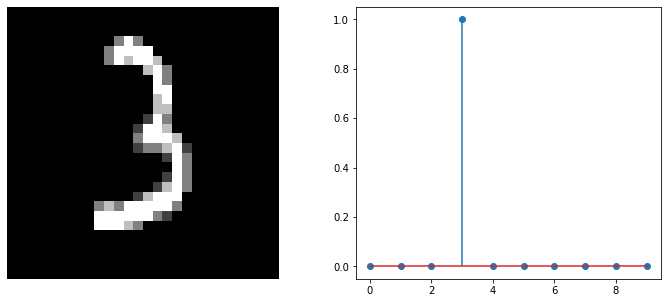

Prediction : 3


In [8]:
test_img = test_x[[1495]]

predict = model.predict(test_img)
mypred = np.argmax(predict, axis = 1)

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(mypred[0]))

## **3. references**

* https://i-systems.github.io/teaching/DL/iNotes_tf2/07_CNN_tf2.html